In [1]:
from __future__ import print_function
import argparse
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import urllib
import zipfile
import torch
import numpy as np
from livelossplot import PlotLosses


Using TensorFlow backend.


In [2]:


batch_size = 64
epochs = 10
lr = 0.01
log_interval = 1
print("Number of epochs: ", epochs)
print("Batch size: ", batch_size)
print("Log interval: ", log_interval)
print("Learning rate: ", lr)



Number of epochs:  10
Batch size:  64
Log interval:  1
Learning rate:  0.01


In [3]:
data_transform = transforms.Compose([
        transforms.Resize(64),
        transforms.ToTensor(),
    ])

kwargs = {'num_workers': 1, 'pin_memory': True} 
train_dataset = datasets.ImageFolder(root='data/d',transform=data_transform)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=4)


In [7]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3,padding=1)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3,padding=1)
        self.fc1 = nn.Linear(8*8*32,512)
        self.fc2 = nn.Linear(512,47)
      

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)  
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        print(x.shape)
        x = x.view(64, -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

model = Net()
model.cuda()

optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()


In [13]:

def train(epoch):
    correct = np.float64(0.0)
    total = np.float64(0.0)
    model.train()
    losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        print
        if batch_idx < 10:
            
            data, target = Variable(data.cuda()), Variable(target.cuda())
            optimizer.zero_grad()
            output = model(data)
          #  print(torch.max(output,dim=1)[1])
          #  print(target)
            loss = criterion(output,target)
            loss.backward()
            optimizer.step()
            losses.append(loss.data[0])
            correct += torch.sum(torch.max(output,dim=1)[1]-target ==0).cpu().data.numpy()
            total +=64
            #target)
#             print("Accuracy = ",correct /total)

#             print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#                 epoch, batch_idx * len(data), len(train_loader.dataset),
#                 100. * batch_idx / len(train_loader), loss.data[0]))
            liveloss.update({
             'log loss': loss.data[0],
               })
            liveloss.draw()
 

        else:
            break
    print("\nTrain set: Average loss: {:.4f}".format(sum(losses) / len(losses)))
    print("Accuracy = ",correct/total)


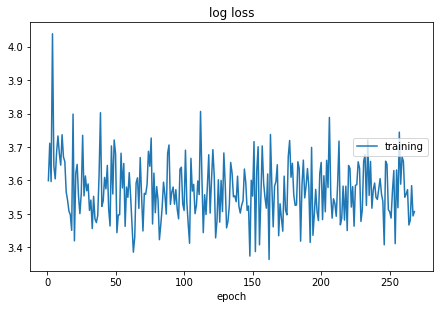


Train set: Average loss: 3.5543
Accuracy =  [0.046875]


In [14]:
for epoch in range(1, epochs + 1):
    train(epoch)

    



In [ ]:
for batch_idx, (data, target) in enumerate(train_loader):
    print(data.shape)
    break

In [10]:
liveloss = PlotLosses()


In [ ]:
test_dataset = datasets.ImageFolder(root='data/d',transform=data_transform)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=batch_size, shuffle=True,
                                             num_workers=4)

In [ ]:
def test(epoch):
    correct = np.float64(0.0)
    total = np.float64(0.0)
    losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        if batch_idx > 80 and batch_idx < 100:
            data, target = Variable(data.cuda()), Variable(target.cuda())
            output = model(data)
            correct += torch.sum(torch.max(output,dim=1)[1]-target ==0).cpu().data.numpy()
            total +=64
        elif batch_idx >100:
            break
    print("Accuracy = ",correct/total)


In [ ]:
test(1)

In [ ]:
model.eval()


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os
folder = "/home/mrleo/HackOverflow/data/d"
f = []
subfolders = [f.path for f in os.scandir(folder) if f.is_dir() ]    

for sub in subfolders:
    minifolder = [f.path for f in os.scandir(sub) ] 
    for ffolder in minifolder:
            files = [f.path for f in os.scandir(ffolder) ]
            print(files)

In [ ]:
model.save_state_dict('trial.pt')

In [ ]:
torch.save(model.state_dict(), './model2.pth')